In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import helper functions
def split_dir_to_train_test_val(directory = "/content/drive/MyDrive/data7",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [5]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="/content/drive/MyDrive/data7/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder berbere. Train data copied. 42 files
Folder berbere. Test data copied. 12 files
Folder berbere. Validation data copied. 7 files
Folder blackCabbage. Train data copied. 55 files
Folder blackCabbage. Test data copied. 16 files
Folder blackCabbage. Validation data copied. 8 files
Folder chicken. Train data copied. 118 files
Folder chicken. Test data copied. 34 files
Folder chicken. Validation data copied. 18 files
Folder carrot. Train data copied. 67 files
Folder carrot. Test data copied. 20 files
Folder carrot. Validation data copied. 10 files
Folder butter. Train data copied. 14 files
Folder butter. Test data copied. 4 files
Folder butter. Validation data copied. 2 files
Folder bread. Train data copied. 71 files
Folder bread. Test data copied. 20 files
Folder bread. Validation data copied. 11 files
Folder cheese. Train data copied. 69 files
Folder cheese. Test data copied. 20 files
Folder cheese. Validation data copied. 10 files
Folder bulgurWheat. Train data copied. 53 files
Fol

In [6]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['Cauliflower', 'berbere', 'blackCabbage', 'bread', 'bulgurWheat',
       'butter', 'cabbage', 'carrot', 'cheese', 'chicken', 'chilliPapper',
       'egg', 'fish', 'flour', 'garlic', 'ginger', 'injera', 'lemon',
       'lentils', 'macaroni', 'meat', 'oil', 'onion', 'pasta', 'peas',
       'pepper', 'potatoes', 'redRoot', 'salad', 'shiro', 'solidLentils',
       'soyaBeans', 'sweetPotatoes', 'tomato', 'turmeric'], dtype='<U13')

In [7]:
len(class_names)

35

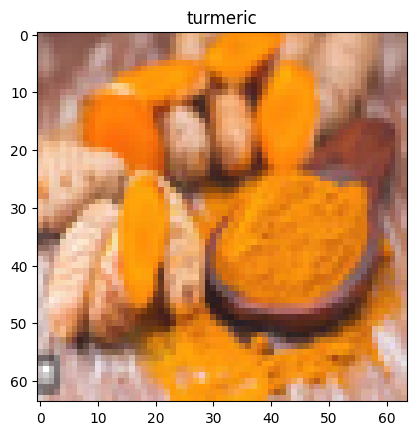

In [12]:
# Let's visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "turmeric")

In [13]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 2180 images belonging to 35 classes.
Found 625 images belonging to 35 classes.
Found 331 images belonging to 35 classes.


In [20]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(35, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

In [21]:
batch_size = len(train_data)

# Fit the model
history = model.fit(train_data,
                    batch_size=batch_size,
                    epochs=30,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

Epoch 1/30
69/69 [==============================] - 8s 70ms/step - loss: 3.2111 - accuracy: 0.1335 - val_loss: 2.6806 - val_accuracy: 0.2266
Epoch 2/30
69/69 [==============================] - 6s 83ms/step - loss: 2.1406 - accuracy: 0.3858 - val_loss: 2.3838 - val_accuracy: 0.3202
Epoch 3/30
69/69 [==============================] - 5s 73ms/step - loss: 1.3799 - accuracy: 0.6239 - val_loss: 2.7728 - val_accuracy: 0.2870
Epoch 4/30
69/69 [==============================] - 4s 62ms/step - loss: 0.8225 - accuracy: 0.7931 - val_loss: 2.4578 - val_accuracy: 0.3414
Epoch 5/30
69/69 [==============================] - 6s 83ms/step - loss: 0.4611 - accuracy: 0.9055 - val_loss: 2.5184 - val_accuracy: 0.3535
Epoch 6/30
69/69 [==============================] - 4s 60ms/step - loss: 0.2414 - accuracy: 0.9468 - val_loss: 2.7005 - val_accuracy: 0.3625
Epoch 7/30
69/69 [==============================] - 6s 83ms/step - loss: 0.1309 - accuracy: 0.9780 - val_loss: 2.9691 - val_accuracy: 0.3686
Epoch 8/30
69

In [22]:
#Evaluate the model
model.evaluate(test_data)

20/20 [==============================] - 3s 127ms/step - loss: 4.1975 - accuracy: 0.3360


[4.197536945343018, 0.335999995470047]

<Axes: >

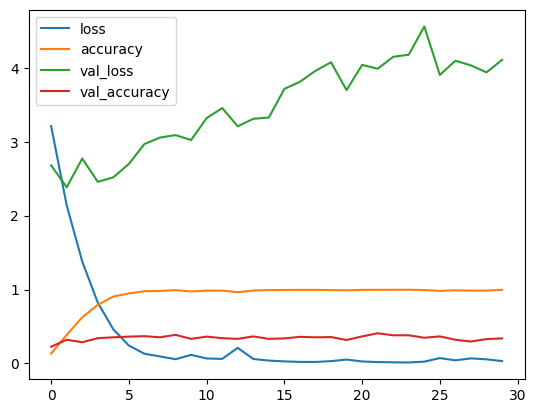

In [23]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [38]:
# Download image
!wget https://images.healthshots.com/healthshots/en/uploads/2022/01/21143156/EGG-1600x900.jpg

def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("/content/drive/MyDrive/data7/chicken/chicken_1529.png", 240)

--2024-02-03 00:17:32--  https://images.healthshots.com/healthshots/en/uploads/2022/01/21143156/EGG-1600x900.jpg
Resolving images.healthshots.com (images.healthshots.com)... 23.203.88.91, 2600:1407:3c00:1688::18a5, 2600:1407:3c00:168d::18a5
Connecting to images.healthshots.com (images.healthshots.com)|23.203.88.91|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-02-03 00:17:35 ERROR 404: Not Found.



In [39]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 [==============================] - 0s 22ms/step


array([[7.50822364e-04, 1.04908097e-04, 8.38858323e-05, 1.89859618e-03,
        4.28804808e-04, 4.28844651e-05, 1.02873356e-03, 2.73418467e-04,
        2.61582676e-02, 3.43195528e-01, 1.55793969e-04, 3.03245813e-01,
        8.38416293e-02, 9.68630426e-03, 4.64093722e-02, 6.16183551e-03,
        4.44010273e-03, 7.11677014e-04, 1.09064022e-05, 1.43270499e-05,
        7.15265796e-02, 6.52150717e-04, 8.92404392e-02, 5.53413178e-04,
        1.05147985e-04, 6.82456070e-04, 5.24987187e-03, 4.19009157e-04,
        6.94703112e-06, 2.24307241e-05, 9.10857343e-04, 1.89907689e-04,
        1.41615956e-03, 7.53696586e-05, 3.05690250e-04]], dtype=float32)

In [40]:
class_names[pred[0].argmax()]

'chicken'